In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncx2


In [2]:
S0 = 100
sigma = 0.3
gamma = 0.75
r = 0.1
T = 3


In [3]:
# Find Call price under CEV

z = 2 + 1/(1-gamma)
def C(t,K):
    kappa = 2*r/(sigma**2*(1-gamma)*(np.exp(2*r*(1-gamma)*t)-1))
    x = kappa*S0**(2*(1-gamma))*np.exp(2*r*(1-gamma)*t)
    y = kappa*K**(2*(1-gamma))
    return S0*(1-ncx2.cdf(y,z,x))-K*np.exp(-r*t)*ncx2.cdf(x,z-2,y)

In [4]:
# Strikes to test volatility between 80 and 120
test_strikes = np.linspace(80,120,41)

# Estimating partial derivatives
delta_t = 0.01
delta_K = 0.01
dC_dT = (C(T+delta_t,test_strikes)-C(T-delta_t,test_strikes))/(2*delta_t)
dC_dK = (C(T,test_strikes+delta_K)-C(T,test_strikes-delta_K))/(2*delta_K)
d2C_dK2 = (C(T,test_strikes+2*delta_K)-2*C(T,test_strikes+delta_K)+C(T,test_strikes))/(delta_K**2)

In [5]:
# Estimating local volatility using Dupire's equation
vol_est = np.sqrt(2)/test_strikes*np.sqrt((dC_dT+r*test_strikes*dC_dK)/d2C_dK2)

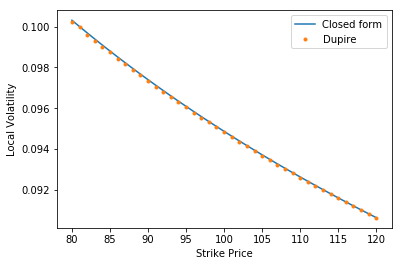

In [11]:
# CEV closed form volatility
cev_vol = sigma * test_strikes ** (gamma - 1)
plt.plot(test_strikes,cev_vol,label = "Closed form")
plt.plot(test_strikes,vol_est,'.',label = "Dupire")
plt.xlabel("Strike Price")
plt.ylabel("Local Volatility")
plt.legend()
plt.show()

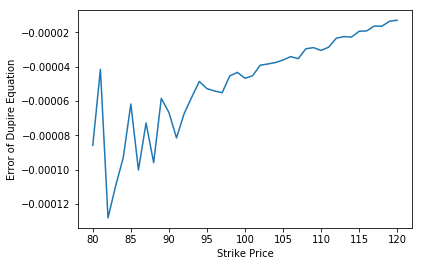

In [15]:
plt.plot(test_strikes,vol_est - cev_vol)
plt.xlabel("Strike Price")
plt.ylabel("Error of Dupire Equation")
plt.show()